<a href="https://colab.research.google.com/github/khushimittal0108/Machine-Learning/blob/master/Spam_Message_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
spam= pd.read_csv('/content/spam_ham_dataset.csv')

In [26]:
spam.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [27]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [29]:
spam = spam[['label','text']]

In [30]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5171 non-null   object
 1   text    5171 non-null   object
dtypes: object(2)
memory usage: 80.9+ KB


In [31]:
spam.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    3672   3531  Subject: calpine daily gas nomination\r\n>\r\n...   20
spam   1499   1462                                      Subject: \r\n   16

In [38]:
spam['length']=spam['text'].apply(len)

In [39]:
spam.head()

,label,text,lenght,length
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,327,327
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,97
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,2524
3,spam,"Subject: photoshop , windows , office . cheap ...",414,414
4,ham,Subject: re : indian springs\r\nthis deal is t...,336,336


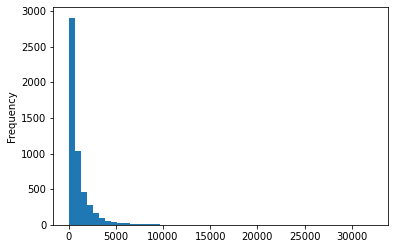

In [40]:
spam['length'].plot(bins=50,kind='hist')

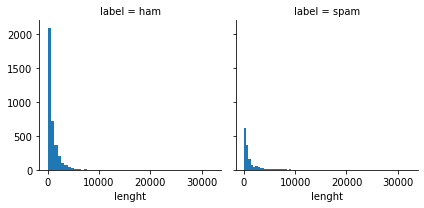

In [41]:
g = sns.FacetGrid(spam,col='label')
g.map(plt.hist,'lenght',bins=50)

In [52]:
import string 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [53]:
from nltk.corpus import stopwords

In [54]:
#lets define a function to remove the unnecesary stuff
def text_process(mes):
  mes.replace('\r\n','')
  nopunc = [char for char in mes if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  return [word for word in nopunc.split() if word.lower() not in stopwords.words('english') ]

In [57]:
#vectorization
#tfidftransformer
#multinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [58]:
#lets create a pipline
from sklearn.pipeline import Pipeline

In [59]:
pipe = Pipeline([('CoV',CountVectorizer(analyzer=text_process)),
                 ('tfidf',TfidfTransformer()),
                 ('nb',MultinomialNB())])

In [60]:
#lets split the data in training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(spam['text'],spam['label'],test_size=0.25)

In [61]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('CoV',
                 CountVectorizer(analyzer=<function text_process at 0x7f11958d6488>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [62]:
predictions= pipe.predict(X_test)

In [64]:
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[927   2]
 [114 250]]


              precision    recall  f1-score   support

         ham       0.89      1.00      0.94       929
        spam       0.99      0.69      0.81       364

    accuracy                           0.91      1293
   macro avg       0.94      0.84      0.88      1293
weighted avg       0.92      0.91      0.90      1293

